![miad4.png](Archivos/miad4.png)

# Laboratorio 1

## Desarrollo de una herramienta analítica usando recursos nativos de Python

Para el desarrollo de esta actividad debes utilizar únicamente recursos nativos de Python (puedes usar librerías como `math` y `random`). Está prohibido el uso de librerías externas, a excepción de `matplotlib`. Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito global de la actividad y puedas desarrollar tu solución apuntando a él desde el inicio.

En algunas de las misiones encontrarás: una **versión base**, la cual indica el requerimiento mínimo de la misión; una **versión completa**, la cual indica mejoras deseables o complementos a la **versión base**. Un desarrollo aceptable del laboratorio debe satisfacer la **versión base** y un desarrollo correcto del laboratorio debe satisfacer la **versión completa**. Cumplir con el desarrollo de la **versión completa** desde un inicio hará más sencillas las misiones siguientes.

Al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar preguntas de negocio y de *analytics*.
2. Leer datos desde archivos y almacenarlos en estructuras de Python.
3. Crear y llamar funciones.
4. Implementar condicionales diferenciando `if`, `elif` y `else`.
5. Implementar ciclos diferenciando el propósito de `for` y `while`.

## Contexto: exploración del potencial para asignar becas Unialpes

La Universidad de los Alpes se ha caracterizado por su compromiso con la generación de impacto en la sociedad a través de diferentes programas de becas. Programas como Becas para los Mejores, entre otros, han sido revolucionarios al permitir que estudiantes de bajos recursos puedan acceder a una de las universidades más prestigiosas del país.

Actualmente, la universidad quiere evaluar el potencial impacto que tendrían algunos programas de acción afirmativa para asignación de becas, con base en información demográfica que ha obtenido a través de encuestas a personas interesadas en becas. Se cuenta con información respecto a la edad, género, estado civil, estrato socioeconómico, región de proveniencia, desempeño académico y nivel de escolaridad de las personas encuestadas. Los encargados de diseñar el programa saben que utilizar criterios basados en este tipo de variables es un tema sensible, pero es necesario si se quieren focalizar las oportunidades en poblaciones menos representadas.

El objetivo de este laboratorio es crear una herramienta computacional que permita a un tomador de decisiones explorar qué efecto podría tener el uso de diferentes reglas para seleccionar a los beneficiarios de las becas. Puntualmente, se espera que, para distintas reglas de selección (ej., pertenecer a cierta región, rango de edad, etc.), la herramienta ofrezca una caracterización de los potenciales beneficiarios de las becas (a partir de estadísticas descriptivas y visualizaciones), de forma que exista un sustento para elegir la regla de selección adecuada.

## Fase 1: obtener e inspeccionar archivos

Los datos de encuestas fueron obtenidos como parte de un trabajo de campo y, por limitaciones tecnológicas, solo se cuenta con la información en archivos de texto plano (`.txt`). Cada archivo corresponde a uno de los atributos antes mencionados y están estructurados de forma que todos relacionan a las personas encuestadas en el mismo orden (i.e., en cada archivo la primera línea corresponde a un dato de la primera persona encuestada, la segunda línea corresponde a un dato de la segunda persona encuestada, etc.).

Los archivos con los que cuentas son:

* `"edad.txt"`: un archivo con la edad de cada persona encuestada;
* `"escolaridad.txt"`: un archivo con el nivel de escolaridad de cada persona encuestada;
* `"estado_civil.txt"`: un archivo con el estado civil de cada persona encuestada;
* `"estrato.txt"`: un archivo con el estrato socioeconómico de cada persona encuestada;
* `"genero.txt"`: un archivo con el género de cada persona encuestada;
* `"promedio.txt"`: un archivo con el promedio académico de cada persona encuestada;
* `"region.txt"`: un archivo con la región de proveniencia de cada persona encuestada.

### Misión 1

**Versión base**: utiliza métodos de lectura de archivos para guardar la información de cada archivo en una estructura de datos de Python, de manera que se respete el orden y la categoría de los datos.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** y llámala dentro de un ciclo para automatizar la lectura de los archivos.

In [7]:
# Implementa tu respuesta en esta celda
import os
#declaracion de variables
root='./Archivos/'

def library():
    result={}
    file_list=os.listdir(root)
    #iteracion en carpeta
    for file in file_list:
        filetype=file.split('.')[1]
    #validacion de tipo de archivo
        if filetype!='txt':
            continue
    #guardado de archivo en variable
        filename=file.split('.')[0]
        with open(root+file,encoding='UTF-8',newline='\n') as f:
            values=f.read().splitlines()
            result[filename]=values
    return result

def library_name():
    result=[]
    file_list=os.listdir(root)
    #iteracion en carpeta
    for file in file_list:
        filetype=file.split('.')[1]
    #validacion de tipo de archivo
        if filetype!='txt':
            continue
    #guardado de archivo en variable
        filename=file.split('.')[0]
        result.append(filename)
    return result
                
def fill_library_by_person():
    result=[]
    person={}
    size=500
    for i in range(size):
        person['id']=i
        for name in library_name():
            person[name]=library()[name][i]
        result.append(person)
        person={}
    return result

def group_unique_items():
    result={}
    for name in library_name():
        result[name]=[]
        for item_name in library()[name]:
            if item_name not in result[name]:
                result[name].append(item_name)
    return result

def count_items():
    result={}
    for name in library_name():
        result[name]=len(set(library()[name]))
    return result


### Misión 2

**Versión base**: calcula estadísticas descriptivas básicas (por lo menos, media/mediana y varianza/desviación) para cada variable relevante en el contexto del problema y repórtalas concluyendo acerca de las principales características de los datos.

**Versión completa**: complementa la **versión base** con visualizaciones informativas sobre los datos (ej., histogramas, gráficos de dispersión, boxplots, etc.), relevantes para el problema.

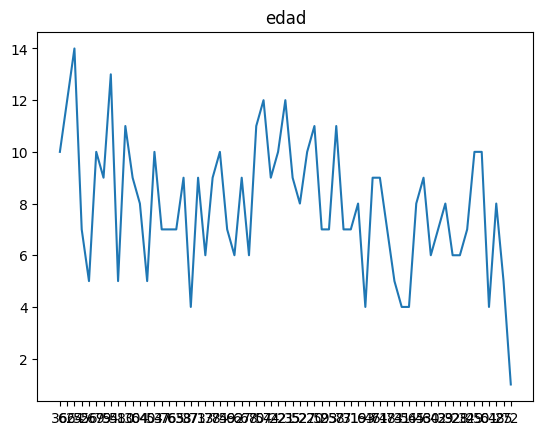

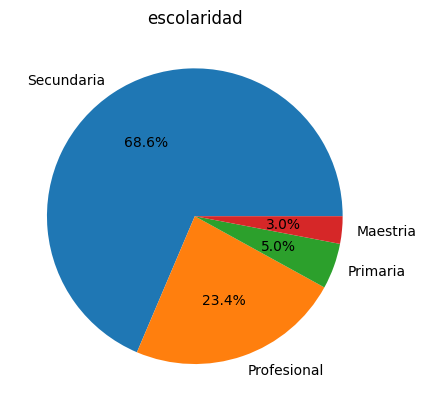

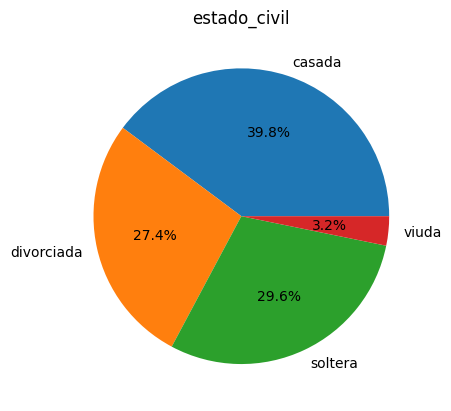

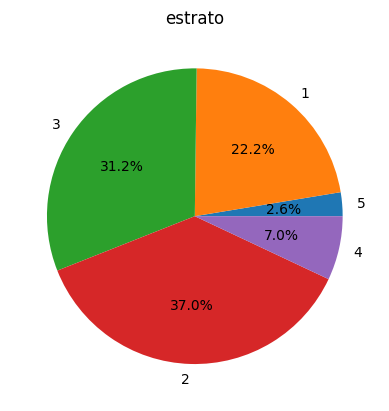

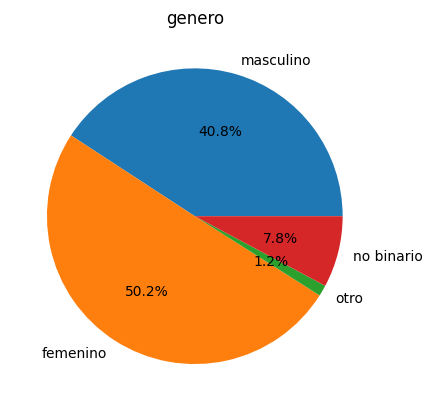

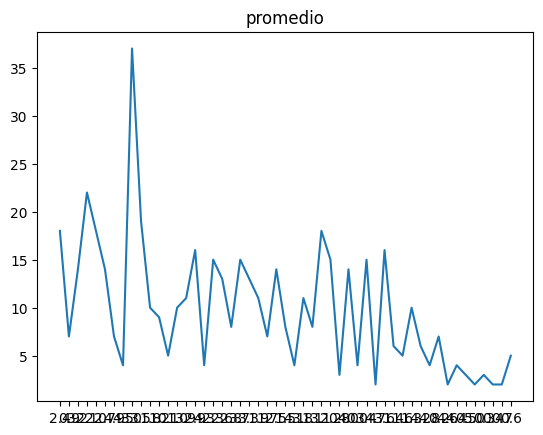

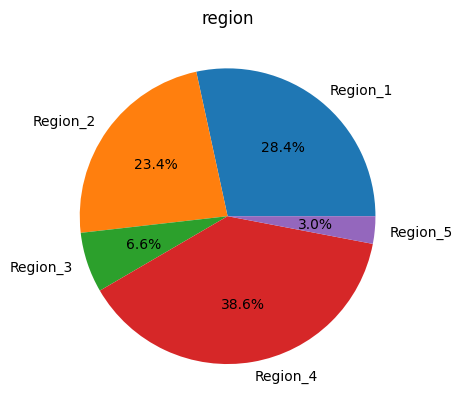

In [8]:
# Implementa tu respuesta en esta celda
import matplotlib.pyplot as plt

def mean(data):return sum(data)/len(data)
def median(data):
    count=len(data)
    pair=lambda dataset:dataset[count//2 -1]
    unpair=lambda dataset:dataset[(count+1)//2]
    return pair(data) if count%2==0 else unpair(data)
def mode(data):
    object_set={}
    for value in data:
            object_set[value]=object_set.get(value,0)+1           
    for key,value in object_set.items():
        if value==max(object_set.values()):
            return key
def poblational_variance(data):return sum((val-mean(data))**2 for val in data)/len(data)
def desv_est(data):return poblational_variance(data)**(1/2)

        
def segment_data(clasificacion,database):
    segmented_values={}
    for clase in clasificacion:
        segmented_values[clase]={}
        if type(database)==dict:
            for item in database[clase]:
                segmented_values[clase][item]=segmented_values[clase].get(item,0)+1
        else:
            for persona in database:
                segmented_values[clase][persona[clase]]=segmented_values[clase].get(persona[clase],0)+1
    return segmented_values

def statistical_data(clasificacion,database):
    statistical_values={}
    cualitative_data=['escolaridad','estado_civil','estrato','genero','region']
    cuantitative_data=['edad','promedio']
    for clase in clasificacion:
        dataset=[]
        statistical_values[clase]={}
        if clase in cuantitative_data:
            for data in database[clase]:
                dataset.append(float(data))
                
            statistical_values[clase]['mean']=round(mean(dataset),2)
            statistical_values[clase]['median']=median(dataset)
            statistical_values[clase]['mode']=mode(dataset)
            statistical_values[clase]['p_variance']=round(poblational_variance(dataset),2)
            statistical_values[clase]['p_desvEst']=round(desv_est(dataset),2)
        
        else:
            for data in database[clase]:
                dataset.append(data)
            statistical_values[clase]['mode']=mode(dataset)
    return statistical_values

def graphic_data(clasificacion,database):
    for name in clasificacion:
        if count_items()[name]>5:
            fig, ax = plt.subplots()
            labels = segment_data(clasificacion,database)[name].keys()
            sizes = segment_data(clasificacion,database)[name].values()
            ax.set_title(name)
            ax.plot(labels,sizes)
            plt.show()
        
        else:
#DEFINIR TIPO DE GRAFICO BASADO EN EL CONTEO DE VARIABLES, MAS DE 5 VAN EN BARRAS, MAS DE 10 EN LINEAS
            fig, ax = plt.subplots()
            labels = segment_data(clasificacion,database)[name].keys()
            sizes = segment_data(clasificacion,database)[name].values()
            ax.set_title(name)
            ax.pie(sizes, labels=labels, autopct='%1.1f%%')
            plt.show()


statistical_data(library_name(),library()) 
graphic_data(library_name(),library())


## Fase 2: abordar la pregunta de negocio

El comité encargado de diseñar el programa de becas ha tenido dificultades para llegar a acuerdos. Algunos piensan que considerar las características sociodemográficas (ej., género, región, etc.) es parte del espíritu del programa, mientras que otros piensan que el criterio de selección debería centrarse estrictamente en lo económico y académico. Dado esto, el comité ha sugerido evaluar dos propuestas, suponiendo un número $N$ de becas disponibles.

* La primera propuesta sugiere que se deben tomar las diferentes regiones y géneros y, para cada una de las combinaciones de estos dos criterios, asignar una cantidad de becas proporcional al número de personas de esa subpoblación con respecto al total de personas encuestadas. Dentro de cada subpoblación, las becas deben aprobarse a las personas con mejor promedio académico.

* La segunda propuesta sugiere que se deben tomar en orden ascendente los estratos y, en cada uno de ellos, asignar una beca a cada una de las personas que se encuentren dentro del 2% con mejor promedio académico en esa subpoblación. En caso de quedar becas disponibles luego de haber cubierto todos los estratos, se repite el mismo esquema hasta asignar todas las becas disponibles, excluyendo a las personas a quienes se les haya asignado una beca en alguna ronda anterior.

### Misión 3

Define la pregunta de negocio y la pregunta de *analytics* para esta situación.

In [9]:
#La pregunta de negocio es saber cual estrategia es mas justa para asignar un numero N de becas, considerando las
#caracteristicas socio-demograficas de la poblacion, asi como sus resultados academicos, de esa forma impactar a la poblacion
#de forma mas coherente con su contexto

#Así mismmo, la pregunta de analytics acá es, cual estrategia de las dos dichas cumple mejor y abarca de forma mas justa
#a el publico objetivo del cual se está indagando. por ende se pide diseñar un modelo descriptivo que permita visualizar
#de una forma mas grafica los distintos escenarios y como se asignan las becas, para así tomar una decision.

#supuestos (N=Numero de becas, poblacion=total personas que aplicaron a la beca)
N=100
poblacion=500



### Misión 4

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la primera propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [10]:
# Implementa tu respuesta en esta celda

def caso1(n,poblacion):
    aceptados_caso_1=[]
    region_proportion={}
    lista_ordenada=sorted(fill_library_by_person(), key=lambda value:(value['promedio']), reverse=True)
    for region in group_unique_items()['region']:
        region_proportion[region]={}
        for persona in lista_ordenada:
            if persona['region']==region:
                region_proportion[region]['total']=region_proportion[region].get('total',0)+1
        region_proportion[region]['porcentaje']=round(region_proportion[region].get('total',0)/poblacion,2)
        region_proportion[region]['becas']=round(region_proportion[region].get('porcentaje',0)*n,0)            
        count=0
        for persona in lista_ordenada:
            if persona['region']==region and count<region_proportion[region]['becas']:
                aceptados_caso_1.append(persona)
                count+=1
    return aceptados_caso_1

### Misión 5

**Versión base**: desarrolla un algoritmo que seleccione a los potenciales beneficiarios de las becas, según la segunda propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** para distintos números $N$ de becas disponibles.

In [11]:
# Implementa tu respuesta en esta celda


def caso2(n,poblacion):
    aceptados_caso_2=[]
    grupo_estrato={}
    lista_ordenada=sorted(fill_library_by_person(), key=lambda value:(value['promedio']), reverse=True)
    while len(aceptados_caso_2)<n:
        for estrato in group_unique_items()['estrato']:
            promedios=[]
            grupo_estrato[estrato]=[]
            for persona in lista_ordenada:
                if persona['estrato']==estrato:
                    grupo_estrato[estrato].append(persona)
                    promedios.append(persona['promedio'])
            muestra_aceptados=lambda data:data if data>0 else 1
            promedios=promedios[:muestra_aceptados(int(len(promedios)*0.02))]     
            for persona in grupo_estrato[estrato]:
                if len(aceptados_caso_2)<n:
                    if persona['promedio'] in promedios:
                        aceptados_caso_2.append(persona)
                        del persona
                else:
                    return aceptados_caso_2


### Misión 6

**Versión base**: con base en tu desarrollo de las misiones 2, 4 y 5, implementa un procedimiento que le permita al comité comparar las dos propuestas, exponiendo métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas que se obtendrían con cada propuesta.

**Versión completa**: escribe una función que sea capaz de ejecutar la **versión base** de manera automática para ambas propuestas.

CASO 1


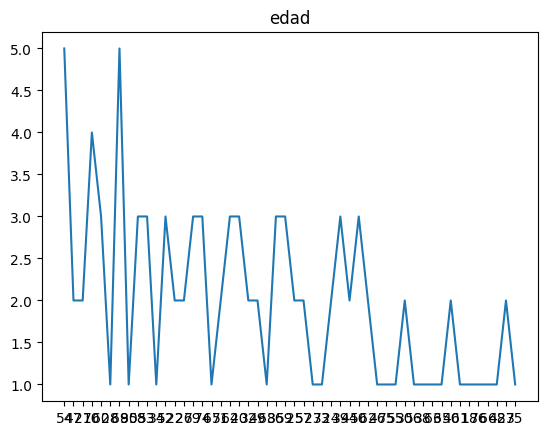

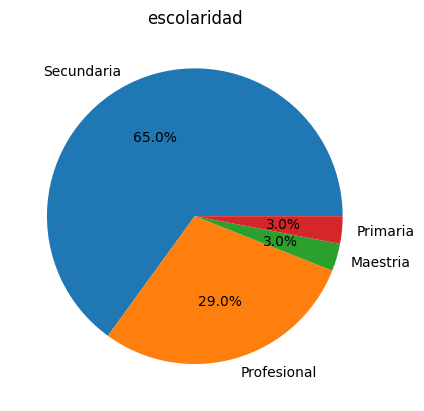

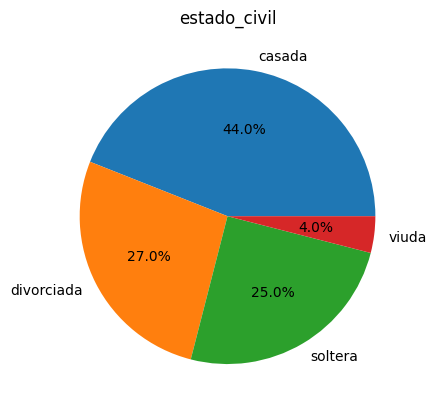

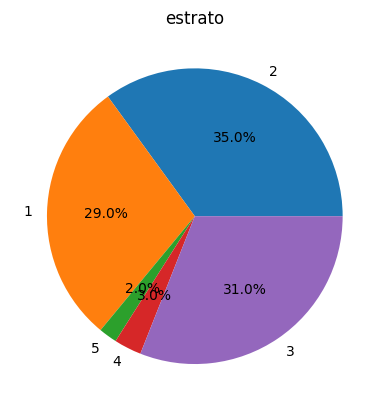

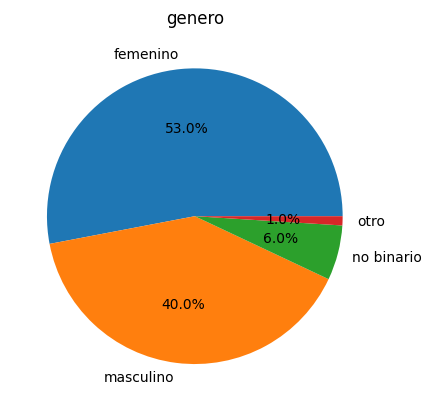

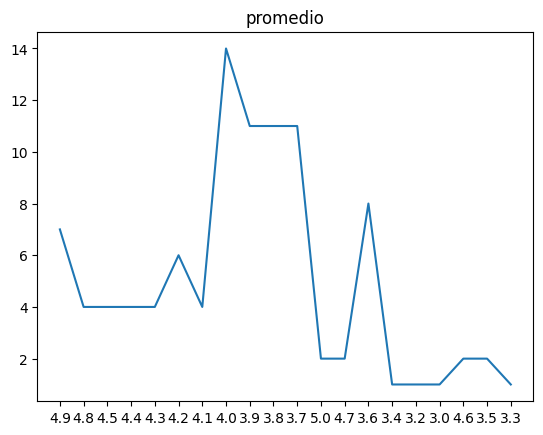

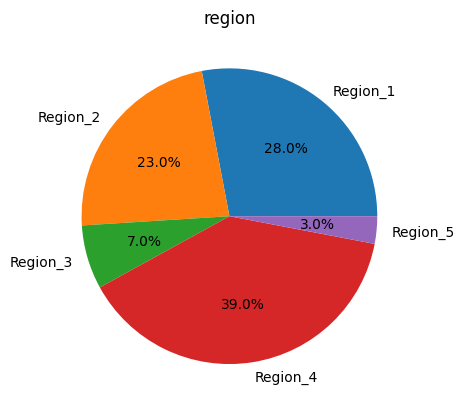

CASO 2


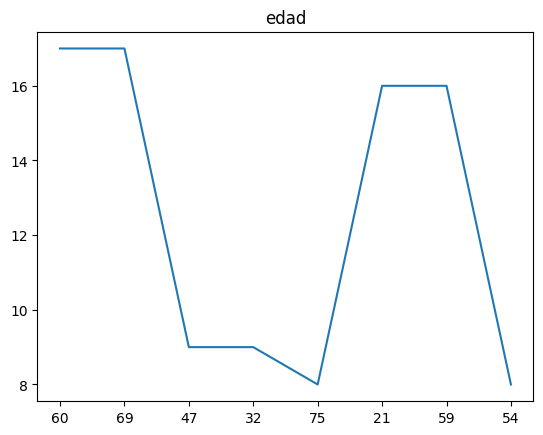

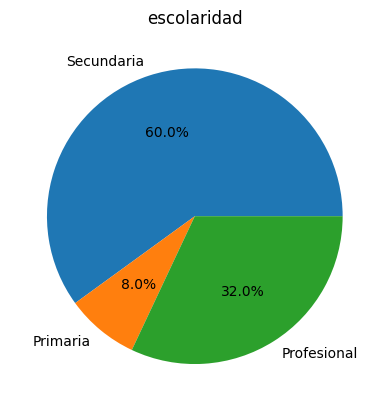

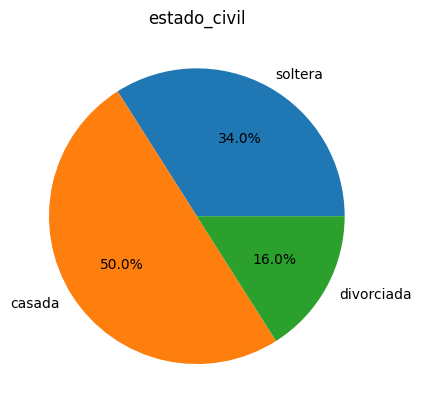

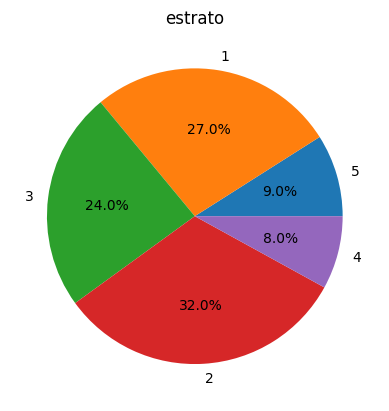

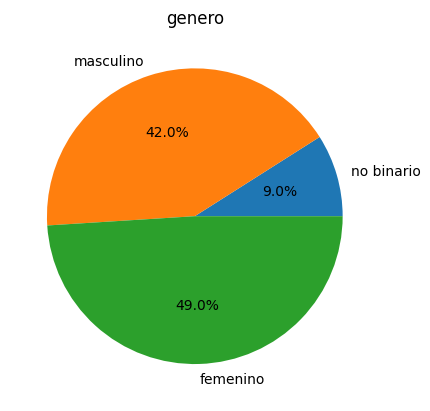

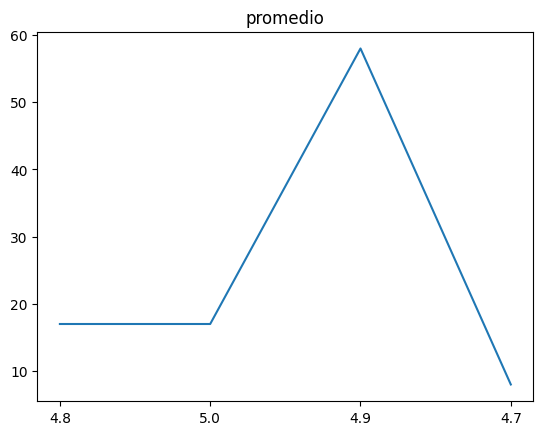

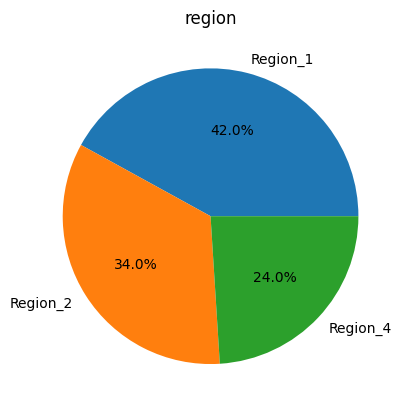

In [12]:
# Implementa tu respuesta en esta celda
print('CASO 1')
graphic_data(library_name(),caso1(N,poblacion))
print('CASO 2')
graphic_data(library_name(),caso2(N,poblacion))

## Fase 3: desarrollar una solución analítica

Reconociendo la complejidad de este problema y viendo el potencial del análisis de datos para enriquecer la discusión, el comité requiere una herramienta analítica que permita definir y evaluar nuevas propuestas de asignación de becas. Se debe poder:

1. Ingresar el número de becas disponibles (ej., `N=0`).


2. Ingresar un rango de edad para los candidatos factibles (ej., `min_edad=99, max_edad=100`).


3. Elegir cualesquiera de las siguientes tres características: género, estrato, región (ej., `caracteristicas=["genero", "estrato"]`).

    
4. Ingresar interactivamente (durante la ejecución de la herramienta) el porcentaje del total de las becas que se asignará a las personas con mejor promedio académico dentro de cada una de las combinaciones de las características elegidas. Por ejemplo, si se eligen las características `"genero"` y `"estrato"`, deberá asignarse un porcentaje a cada combinación (ej., asignar 3\% de las becas al género `"masculino"` del estrato `1`, asignar 5\% de las becas al género `"femenino"` del estrato `1`, etc.).

La herramienta debe permitir al comité configurar una nueva propuesta y seleccionar al grupo de potenciales beneficiarios de las becas de acuerdo con la propuesta configurada. Además, la herramienta debe exponer métricas y visualizaciones de las principales características demográficas de los potenciales beneficiarios de las becas.

### Misión 7

Desarrolla un algoritmo que reciba los parámetros para configurar la nueva propuesta y seleccione a los potenciales beneficiarios de las becas.

In [13]:
# Implementa tu respuesta en esta celda
def filtro_edad(min_edad,max_edad):
    lista_ordenada=sorted(fill_library_by_person(), key=lambda value:(value['promedio']), reverse=True)
    result=[]
    for persona in lista_ordenada:
        if int(persona['edad'])>=min_edad and int(persona['edad'])<=max_edad:
            result.append(persona)
    return result

def filtro_caracteristica(n,filtro_edad,caracteristicas):
    result=[]
    primer_filtro=filtro_edad
    if len(caracteristicas)==3:
        caracteristica1=group_unique_items()[caracteristicas[0]]
        caracteristica2=group_unique_items()[caracteristicas[1]]
        caracteristica3=group_unique_items()[caracteristicas[2]]
        for caso1 in caracteristica1:
            for caso2 in caracteristica2:
                for caso3 in caracteristica3:
                    porcentaje=input(f'ingresa % de aceptacion para {caso1} {caso2} {caso3} (solo numero):')
                    porcentaje=float(porcentaje)*0.01 if porcentaje!='' and float(porcentaje)>=0 else 0
                    total_becas_caso=round(porcentaje*n,0)
                    for persona in primer_filtro:
                        if persona[caracteristicas[0]]==caso1 and persona[caracteristicas[1]]==caso2 and persona[caracteristicas[2]]==caso3 and len(result)<n and total_becas_caso>0:
                            result.append(persona)
                            total_becas_caso-=1
                            del persona
    if len(caracteristicas)==2:
        caracteristica1=group_unique_items()[caracteristicas[0]]
        caracteristica2=group_unique_items()[caracteristicas[1]]
        for caso1 in caracteristica1:
            for caso2 in caracteristica2:
                porcentaje=input(f'ingresa % de aceptacion para {caso1} {caso2} (solo numero):')
                porcentaje=float(porcentaje)*0.01 if porcentaje!='' and float(porcentaje)>=0 else 0
                total_becas_caso=round(porcentaje*n,0)
                for persona in primer_filtro:
                    if persona[caracteristicas[0]]==caso1 and persona[caracteristicas[1]]==caso2 and len(result)<n and total_becas_caso>0:
                        result.append(persona)
                        del persona
    if len(caracteristicas)==1:
        caracteristica1=group_unique_items()[caracteristicas[0]]
        for caso1 in caracteristica1:
            porcentaje=input(f'ingresa % de aceptacion para {caso1} {caso2} (solo numero):')
            porcentaje=float(porcentaje)*0.01 if porcentaje!='' and float(porcentaje)>=0 else 0
            total_becas_caso=round(porcentaje*n,0)
            for persona in primer_filtro:
                if persona[caracteristicas[0]]==caso1 and persona[caracteristicas[1]]==caso2 and len(result)<n and total_becas_caso>0:
                    result.append(persona)
                    del persona
    if len(result)<n:
        for persona in primer_filtro:
            if len(result)<n:
                result.append(persona)
                del persona
    return result

def caso3(n,min_edad,max_edad,caracteristicas):
    primer_filtro=filtro_edad(min_edad,max_edad)
    caracteristicas_aceptadas=["genero", "estrato",'region']
    for caracteristica in caracteristicas: 
        if caracteristica not in caracteristicas_aceptadas:
            print(f'Caracteristica {caracteristica} no disponible')
            return
    segundo_filtro=filtro_caracteristica(n,primer_filtro,caracteristicas)
    return segundo_filtro

### Misión 8

Con base en tu desarrollo de la misión 7, implementa un algoritmo que: le permita al comité configurar una nueva propuesta; exponga métricas y visualizaciones de las principales características demográficas del grupo de potenciales beneficiarios para la propuesta configurada.

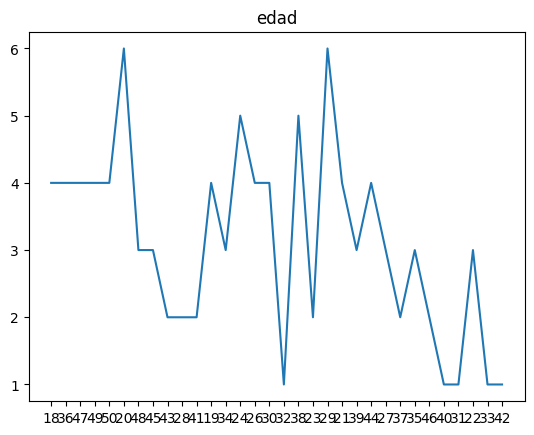

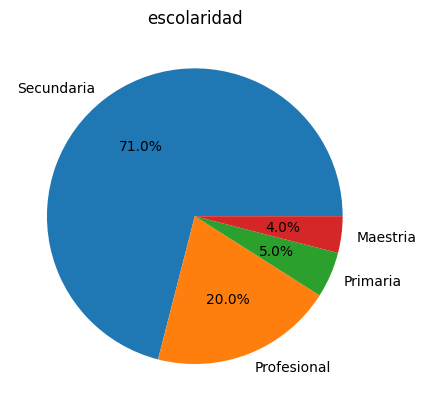

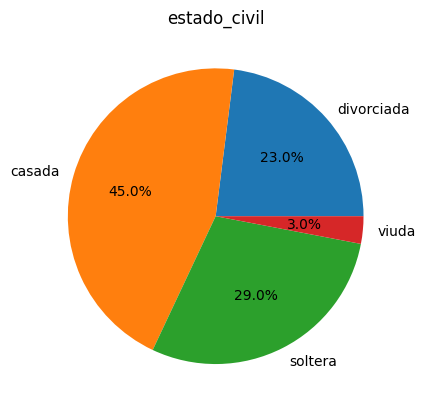

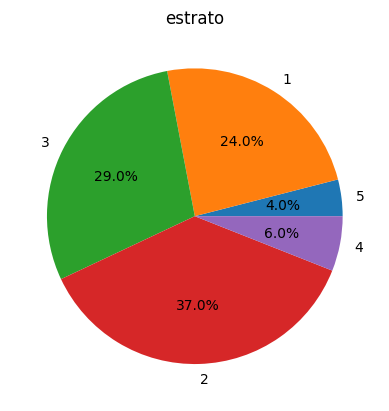

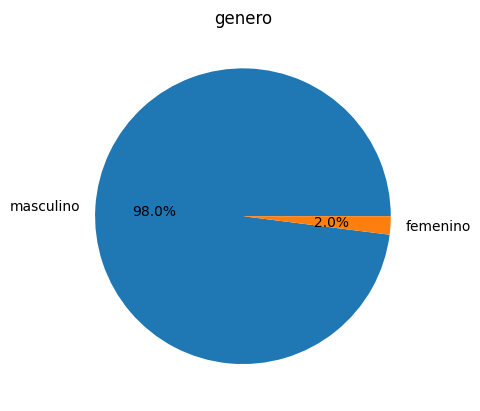

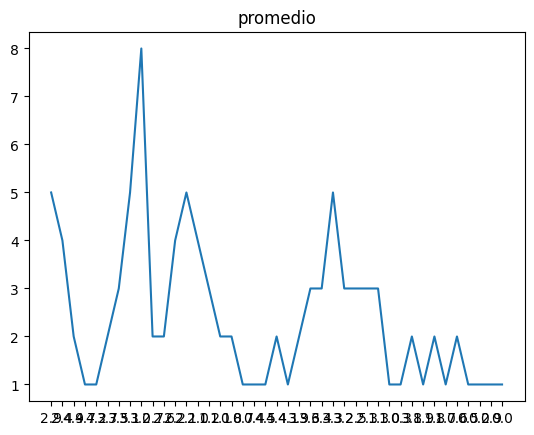

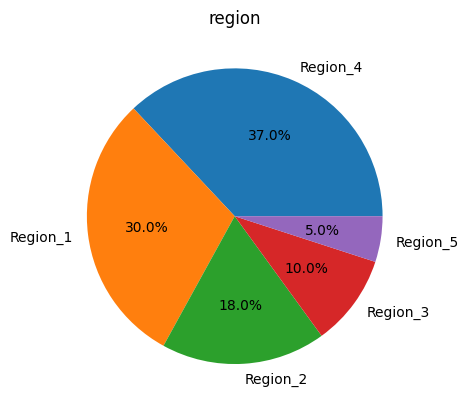

In [14]:
# Implementa tu respuesta en esta celda
#Para configurar esta propuesta debe ingresar los siguientes datos:
#N=Numero de becas
#min_edad=edad minima de los aspirantes
#max_edad=edad maxima de los aspirantes
#caracteristicas=caracteristicas que se desean filtrar, se pueden ingresar hasta 3, las opciones son: 'genero', 'estrato', 'region'
#ejemplo:
N=100
min_edad=10
max_edad=50
caracteristicas=['genero','estrato']




#Este codigo interactua con los datos que ingresa el usuario
graphic_data(library_name(),caso3(N,min_edad,max_edad,caracteristicas))

### Misión 9

Utiliza tu herramienta para configurar propuestas a tu criterio. Con sustento en las métricas y visualizaciones que obtengas, elige una de las propuestas que configuraste. Compara y concluye acerca de las virtudes y falencias de tu propuesta con respecto a las de las dos propuestas del comité.

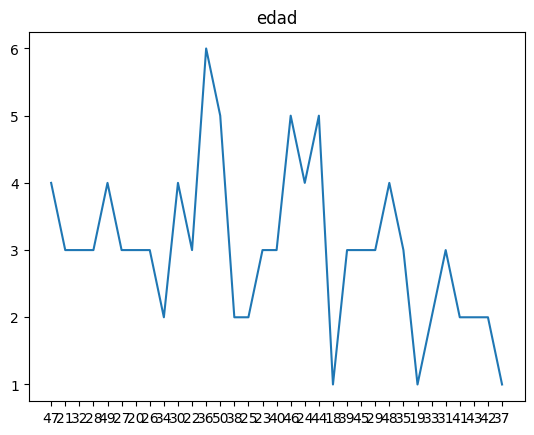

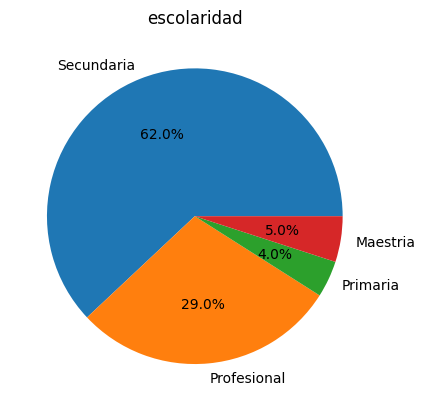

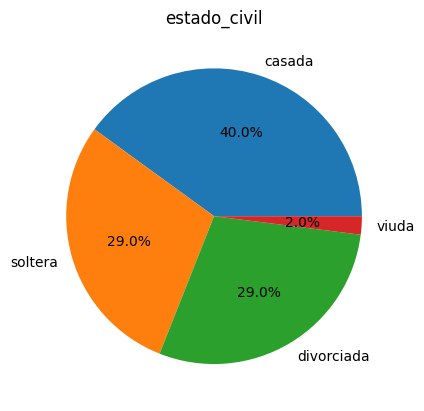

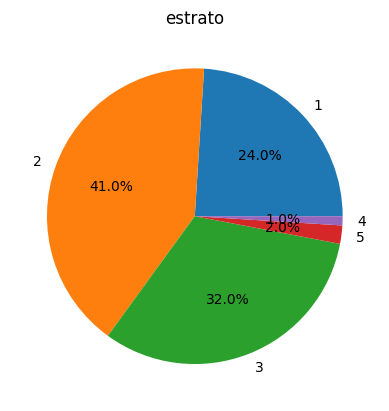

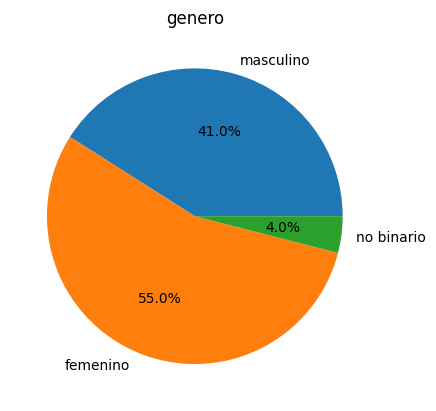

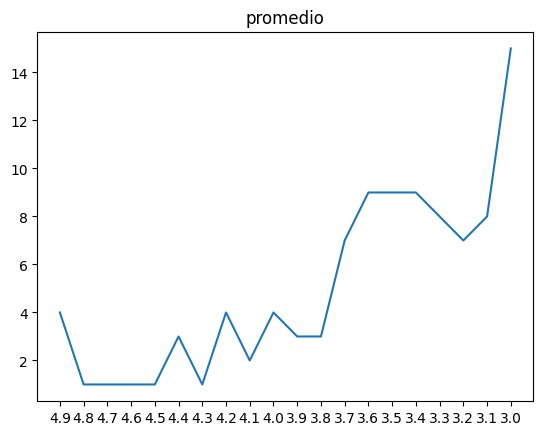

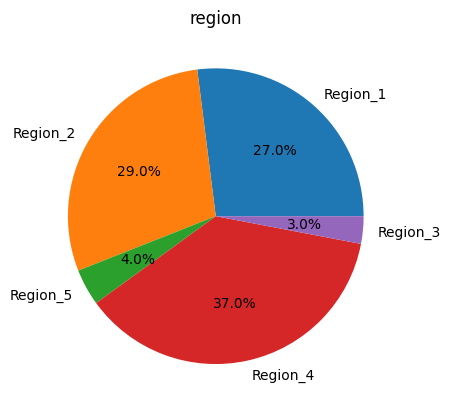

In [15]:
# Implementa tu respuesta en esta celda
min_edad=1
max_edad=50
caracteristicas=[]
graphic_data(library_name(),caso3(N,min_edad,max_edad,caracteristicas))

# En mi criterio escogí una estrategia que se basa en promedios solamente, en personas con un rango de edad que va hasta los 50 años
#Esta estrategia fue tomada en consideracion, debido a la investigacion de edad de rendimiento máximo en relacion a distintas tareas cognitivas
#publicada por la revista psychological Science en 2015,(https://ichef.bbci.co.uk/news/640/cpsprodpb/12816/production/_105989757_grafico-edad-maxima-conocimiento-nc.png)
#asi mismo se tomó este criterio ya que abarca los 3 estratos poblacionales con menos recursos, lo cual es coherente con el proposito de la beca.
#Tambien se toma en cuenta que el grueso de la poblacion tiene estudios entre bachillerato y profesional, impulsando sus carreras profesionales
#así mismo su genero es mayoritariamente femenino, poblacion que en colombia tiene menos oportunidades de acceso a la educacion superior.

#las principales virtudes de esta son la igualdad como se tratan a los candidatos, basados en sus meritos y potencial al haber sacado buenos promedios
#como principales desventajas se nota la inequidad en asignacion de becas para las regiones 3 y 5 las cuales solo suman un 8% del total, Lastimosamente estas regiones
#tienen pocos participantes o su promedio no logró llegar a las expectativas del promedio regional

## Referencias

* Discriminación Positiva<br>
https://es.wikipedia.org/wiki/Discriminaci%C3%B3n_positiva
* Análisis de formulación del programa “Ser Pilo Paga”<br>
https://repository.urosario.edu.co/handle/10336/12526
* La acción afirmativa en la Universidad de los Andes: El caso del programa "Oportunidades para talentos nacionales"<br> http://www.scielo.org.co/scielo.php?script=sci_arttext&pid=S0123-885X2004000300005
* Acción afirmativa y equidad: un análisis desde la propuesta de Thomas Nagel<br>
http://www.scielo.org.mx/scielo.php?script=sci_arttext&pid=S2007-24062016000200049

## Créditos

__Autores__: Camilo Hernando Gómez Castro, Alejandro Mantilla Redondo, Diego Alejandro Cely Gómez.
 
__Fecha última actualización__: 11/07/2022